In [13]:
import numpy as np
import matplotlib.pyplot as plt

def getStateToRC(state):
    r = state // 6 ## col
    c = state % 6
    return r, c

def getRCToState(r, c):
    return int(r*6 + c)

def xp_step(state, action):
    r, c = getStateToRC(state)
    if (r>0 and action == 0): ## 4 actions up down left right
        r-=1
    if (r<3 and action == 1):
        r+=1
    if (c>1 and action == 2):
        c-=1
    if (c<5 and action == 3):
        c+=1

    state2 = getRCToState(r, c)
    done = False
    reward = -10
    if (state2 == 13):
        done = True
        reward = 100
    return state2, reward, done

env = []

# Define Q-learning function
def QLearning(env, learning, discount, epsilon, min_eps, episodes):
    # Determine size of discretized state space
    num_states = 24
    
    # Initialize Q table
    Q = np.random.uniform(low = -1, high = 1, 
                          size = (24, 4))
    
    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []
    
    # Calculate episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes
    
    # Run Q learning algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        tot_reward, reward = 0,0
        state = np.random.randint(0, 23)
    
        while done != True:                  
            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state]) 
            else:
                action = np.random.randint(0, 3)
                
            # Get next state and reward
            state2, reward, done = xp_step(state, action) 
 
            #Allow for terminal states
            if done:
                Q[state, action] = reward
                
            # Adjust Q value for current state
            else:
                delta = learning * (reward + discount * np.max(Q[state2]) - Q[state, action])
                Q[state, action] += delta
                                     
            # Update variables
            tot_reward += reward
            state = state2
        
        # Decay epsilon
        if epsilon > min_eps:
            epsilon -= reduction
        
        # Track rewards
        reward_list.append(tot_reward)
        
        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            
        if (i+1) % 100 == 0:    
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
            
    # env.close()
    
    return ave_reward_list, Q



In [14]:
# Run Q-learning algorithm
rewards, Q = QLearning(env, 0.2, 0.9, 0.8, 0, 10000)



Episode 100 Average Reward: 31.3
Episode 200 Average Reward: 28.7
Episode 300 Average Reward: 31.6
Episode 400 Average Reward: 37.3
Episode 500 Average Reward: 32.5
Episode 600 Average Reward: 38.3
Episode 700 Average Reward: 21.2
Episode 800 Average Reward: 43.7
Episode 900 Average Reward: 35.5
Episode 1000 Average Reward: 29.9
Episode 1100 Average Reward: 35.7
Episode 1200 Average Reward: 51.6
Episode 1300 Average Reward: 44.5
Episode 1400 Average Reward: 27.7
Episode 1500 Average Reward: 44.1
Episode 1600 Average Reward: 40.1
Episode 1700 Average Reward: 47.1
Episode 1800 Average Reward: 51.5
Episode 1900 Average Reward: 50.4
Episode 2000 Average Reward: 47.0
Episode 2100 Average Reward: 39.9
Episode 2200 Average Reward: 48.4
Episode 2300 Average Reward: 50.7
Episode 2400 Average Reward: 52.2
Episode 2500 Average Reward: 50.3
Episode 2600 Average Reward: 55.3
Episode 2700 Average Reward: 52.6
Episode 2800 Average Reward: 46.2
Episode 2900 Average Reward: 59.2
Episode 3000 Average Re

Text(0.5, 1.0, 'Average Reward vs Episodes')

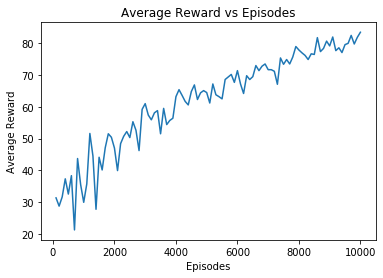

In [15]:
# Plot Rewards
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
# plt.savefig('rewards.jpg')     
# plt.close()  

In [16]:
print (Q)

[[ 45.8         62.          45.8         61.63466374]
 [ 62.          80.          62.          -1.81354131]
 [ 45.8         62.          62.          -0.45326156]
 [ 31.22        45.8         45.8         -2.6187447 ]
 [ 18.098       31.22        31.22        -4.73750039]
 [  6.28819897  18.09799998  18.098       -8.75651054]
 [ 45.8         80.          62.          -2.6319882 ]
 [ 62.         100.          80.          -0.2430151 ]
 [ 45.8         80.          80.          -1.99823997]
 [ 31.22        62.          62.          -0.16117742]
 [ 18.098       45.8         45.8         -1.96228208]
 [  6.28819967  31.21999939  31.22        -5.84837323]
 [ 62.          62.          80.         100.        ]
 [ 79.99999659  79.99997413 100.          -0.80632031]
 [ 62.          62.         100.           0.17911457]
 [ 45.8         45.8         80.          -0.33005379]
 [ 31.22        31.22        62.           0.85784548]
 [ 18.0979999   18.0979473   45.8          0.25771016]
 [ 80.    